In [179]:
# -*- coding: utf-8 -*-
# Anaëlle Pierredon et Jianying Liu

"""
Ce notebook permet de faire des visualisations de nos fichiers résultats et notamment :

- Cas selon le type de MWE
- Cas selon le corpus
- Validation selon Cas + catégorie

- Vrais selon le type de MWE
- Vrais selon le cas
- Quelque chose avec le degré

- Nombre d'expressions différentes (lemmes)
- VID les plus courantes
- LVC les plus courantes
- Répartitions de la validation de quelques expressions les plus courantes
"""

import glob
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

plt.rcParams["figure.figsize"] = (13,10)

# Lecture des fichiers

In [180]:
# Lecture des fichiers json et création d'un pandas dataframe contenant les résultats de tous les corpus
# Chaque ligne du dataframe correspond à une expression trouvée
liste_fichiers = []
df_resultats = pd.DataFrame()

for fichier in glob.glob("*_validation.json"):
    if "ancor" not in fichier:
        corpus = fichier.split('_')[0]
        print(corpus)
        with open(fichier, 'r') as json_file:
            data = json.load(json_file)
            for type_mwe in data:
                dftmp = pd.DataFrame(data[type_mwe]['MWES'])
                dftmp["TYPE"] = type_mwe
                dftmp["CORPUS"] = corpus
                df_resultats = pd.concat([df_resultats, dftmp], ignore_index = True)
df_resultats.tail(3)

ER
frwiki
emea
annodisER


,FICHIER,PHRASE,TOKENS,COREF,CAS,CHAINE(S),VALIDATION,DEGRE DE COMPOSITIONNALITE,SOURCE D'ERREUR,TYPE,CORPUS
271,annodisER_15_mwe_coref.cupt,"Atteinte depuis peu d'une grave maladie, Suzan...","['Atteinte', 'maladie']","['*', '13:3']",{'3': 4},"{'13': '{'3': ['une', 'grave', 'maladie'], '11...",faux,,[chaîne incorrecte],LVC.full,annodisER
272,annodisER_15_mwe_coref.cupt,Quand elle ne vaquait pas à ses occupations mé...,"['faire', 'courses']","['*', '4:71']",{'71': 4},"{'4': '{'67': ['ses', 'occupations', 'ménagère...",faux,,[chaîne incorrecte],LVC.full,annodisER
273,annodisER_15_mwe_coref.cupt,Quand elle ne vaquait pas à ses occupations mé...,"['faire', 'causette']","['*', '11:73;11:74;4:75']","{'73': 4, '74': 4, '75': 3}","{'11': '{'70': ['commun'], '72': ['centre', 'v...",faux,,[chaîne incorrecte],LVC.full,annodisER


In [181]:
# Nombre d'expressions, Nombre de corpus, Corpus le plus courant
df_resultats["CORPUS"].describe()

count     274
unique      4
top        ER
freq       96
Name: CORPUS, dtype: object

# Graphiques sur les résultats globaux

In [182]:
# Mini df cas - type - corpus
# Chaque ligne correspond à un cas (parfois plusieurs cas pour une expression trouvée)
dico = {}
cnt = 0
for ind in df_resultats.index:
    for cas in eval(df_resultats['CAS'][ind]).values():
        dico[cnt] = {"CAS":cas,
                     "TYPE":df_resultats['TYPE'][ind],
                     "CORPUS":df_resultats['CORPUS'][ind]}
        cnt +=1
minidf = pd.DataFrame(dico).T
minidf.head(3)

,CAS,TYPE,CORPUS
0,4,LVC.cause,ER
1,3,IRV,ER
2,4,LVC.full,ER


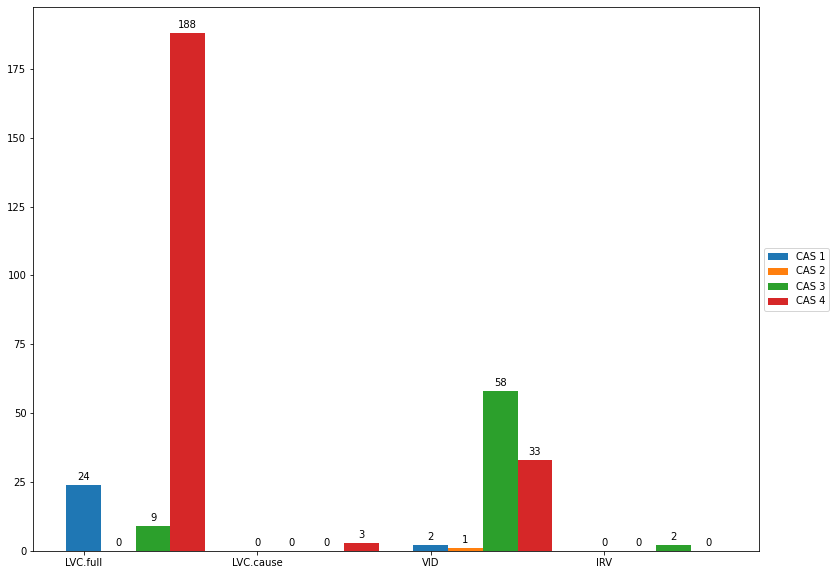

In [183]:
# Cas selon le type de MWE
cas1 = {"LVC.full": 0, "LVC.cause": 0, "VID": 0, "IRV": 0}
cas2 = {"LVC.full": 0, "LVC.cause": 0, "VID": 0, "IRV": 0}
cas3 = {"LVC.full": 0, "LVC.cause": 0, "VID": 0, "IRV": 0}
cas4 = {"LVC.full": 0, "LVC.cause": 0, "VID": 0, "IRV": 0}
for ind in minidf.index:
    if minidf['CAS'][ind] == 1:
        cas1[minidf['TYPE'][ind]] += 1
    elif minidf['CAS'][ind] == 2:
        cas2[minidf['TYPE'][ind]] += 1
    elif minidf['CAS'][ind] == 3:
        cas3[minidf['TYPE'][ind]] += 1
    elif minidf['CAS'][ind] == 4:
        cas4[minidf['TYPE'][ind]] += 1

annotations = cas1.keys()
x = np.arange(len(annotations))
barWidth = 0.20

# Set position of bar on X axis
r1 = x
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


fig, ax = plt.subplots()
un = ax.bar(r1, cas1.values(), width=barWidth, label='CAS 1')
deux = ax.bar(r2, cas2.values(), width=barWidth, label='CAS 2')
trois = ax.bar(r3, cas3.values(), width=barWidth, label='CAS 3')
quatre = ax.bar(r4, cas4.values(), width=barWidth, label='CAS 4')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticks(x)
ax.set_xticklabels(annotations)

ax.bar_label(un, padding=3)
ax.bar_label(deux, padding=3)
ax.bar_label(trois, padding=3)
ax.bar_label(quatre, padding=3)
plt.show()

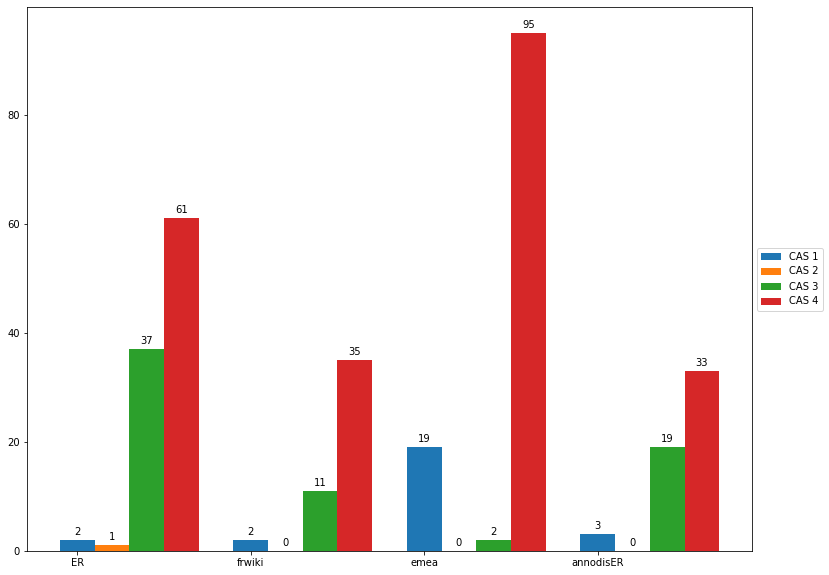

In [184]:
# Cas selon le corpus

cas1 = {"ER": 0, "frwiki": 0, "emea": 0, "annodisER": 0}
cas2 = {"ER": 0, "frwiki": 0, "emea": 0, "annodisER": 0}
cas3 = {"ER": 0, "frwiki": 0, "emea": 0, "annodisER": 0}
cas4 = {"ER": 0, "frwiki": 0, "emea": 0, "annodisER": 0}
for ind in minidf.index:
    if minidf['CAS'][ind] == 1:
        cas1[minidf['CORPUS'][ind]] += 1
    elif minidf['CAS'][ind] == 2:
        cas2[minidf['CORPUS'][ind]] += 1
    elif minidf['CAS'][ind] == 3:
        cas3[minidf['CORPUS'][ind]] += 1
    elif minidf['CAS'][ind] == 4:
        cas4[minidf['CORPUS'][ind]] += 1

annotations = cas1.keys()
x = np.arange(len(annotations))
barWidth = 0.20

# Set position of bar on X axis
r1 = x
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


fig, ax = plt.subplots()
un = ax.bar(r1, cas1.values(), width=barWidth, label='CAS 1')
deux = ax.bar(r2, cas2.values(), width=barWidth, label='CAS 2')
trois = ax.bar(r3, cas3.values(), width=barWidth, label='CAS 3')
quatre = ax.bar(r4, cas4.values(), width=barWidth, label='CAS 4')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticks(x)
ax.set_xticklabels(annotations)

ax.bar_label(un, padding=3)
ax.bar_label(deux, padding=3)
ax.bar_label(trois, padding=3)
ax.bar_label(quatre, padding=3)
plt.show()

In [ ]:
# Validation selon Cas + catégorie

# Graphiques sur les résultats corrects 

In [ ]:
# Vrais selon le type de MWE

In [ ]:
# Vrais selon le cas

In [ ]:
# Quelque chose avec le degré ?

# Graphiques sur les expressions polylexicales

In [ ]:
# Nombre d'expressions différentes (lemmes)

In [ ]:
# VID les plus courantes

In [ ]:
# LVC les plus courantes

In [ ]:
# Répartitions de la validation de quelques expressions les plus courantes